Cats Vs Dogs Dataset

This dataset is a foundational problem for Convolution Neural Network model that involves classification of a cat and dog. We will use this dataset to learn how tyo develop, evaluate, and use CNN for images classification. In this notebook, you will learn;

1. How to load and prepare images for training purpose
2. split data fot training, testing, and validation purposes
3. Encode data
4. develop a CNN model using keras
5. evaluate model performance
6. save and load the model
7. create a confusion matrix for the trained model



In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import cv2
from os import makedirs # make directory
from os import listdir # list directories
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread # Used to read images
from PIL import Image # Image Visulization
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds #(loads large dataset)
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,  load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

Use the python module zipfile to extract files from the downloaded zip

In [2]:
from zipfile import ZipFile 
  
data_path = "cats-vs-dogs.zip"
with ZipFile (data_path, 'r') as zip: 
    zip.extractall() 
    print('The data set has been extracted.') 

The data set has been extracted.


In [3]:
import os

path = r"cats-vs-dogs.zip"
assert os.path.isfile(path)
with open(path, "r") as f:
    pass

In [4]:
'!unzip "cats-vs-dogs.zip/train.zip"'

'!unzip "cats-vs-dogs.zip/train.zip"'

In [5]:
'!unzip "cats-vs-dogs.zip/test1.zip"'

'!unzip "cats-vs-dogs.zip/test1.zip"'

load the images in a dataframe

In [6]:
image_dir = "train"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [7]:
data.shape

(25000, 2)

Our dataset has 25000 rows and two columns

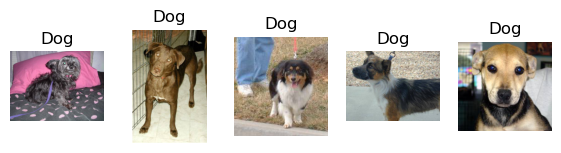

In [8]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(5):
    
    plt.subplot(10, 14,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

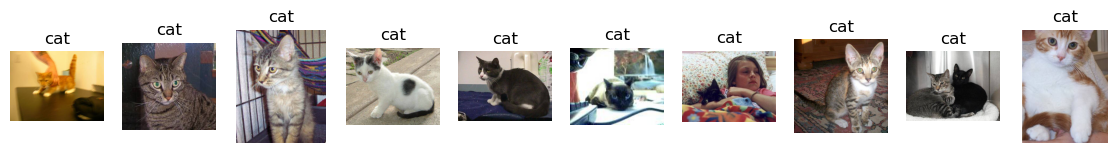

In [9]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(10, 14,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('cat',fontsize=12)
    plt.axis('off')

plt.show()

In [10]:
# train test split using dataframe

labels = data['label']

# 20% split
# 80%.    20%
X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

# 10%.   10%
X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


In [11]:
# Define image directories
base_dir = 'cats-vs-dogs.zip'
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test1/')




In [12]:
# Create ImageDataGenerators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



In [13]:
#4 Train the model using the preprocessed training and validation sets.

#Choose an appropriate batch size and number of epochs.
#Use data augmentation techniques (e.g., Keras ImageDataGenerator) to improve performance.
#Evaluate the model:

# Applying image data gernerator to train and test data

train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = 'train/',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = 20,
                                                    target_size = (128, 128)
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val, directory = 'train/',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = 20,
                                                 target_size = (128, 128),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test, 
                                                  directory = 'train/',x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = 20,
                                                  target_size = (128, 128),
                                                  shuffle=False
                                                 )
                                                 

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601,157 (9.92 MB)

 Trainable params: 2,601,157 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 2,restore_best_weights=True,verbose=0)

In [18]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator, 
                    callbacks=[learning_rate_reduction],
                    epochs = 5,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 828s 815ms/step - accuracy: 0.5022 - loss: 0.6977 - val_accuracy: 0.4888 - val_loss: 0.6932 - learning_rate: 1.0000e-05
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 653s 650ms/step - accuracy: 0.4836 - loss: 0.6932 - val_accuracy: 0.4916 - val_loss: 0.6932 - learning_rate: 1.0000e-05
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 516s 514ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.4944 - val_loss: 0.6931 - learning_rate: 1.0000e-05
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 575s 573ms/step - accuracy: 0.4950 - loss: 0.6931 - val_accuracy: 0.4976 - val_loss: 0.6931 - learning_rate: 1.0000e-05
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 479s 477ms/step - accuracy: 0.4974 - loss: 0.6931 - val_accuracy: 0.4976 - val_loss: 0.6931 - learning_rate: 1.0000e-05


In [19]:
cat_dog.history

{'accuracy': [0.4871000051498413,
  0.4881500005722046,
  0.49674999713897705,
  0.49639999866485596,
  0.4986000061035156],
 'loss': [0.6943255066871643,
  0.6931564211845398,
  0.6931509971618652,
  0.6931484937667847,
  0.6931478977203369],
 'val_accuracy': [0.4887999892234802,
  0.49160000681877136,
  0.4943999946117401,
  0.4975999891757965,
  0.4975999891757965],
 'val_loss': [0.6931700110435486,
  0.6931542754173279,
  0.6931499242782593,
  0.6931486129760742,
  0.6931483149528503],
 'learning_rate': [9.999999747378752e-06,
  9.999999747378752e-06,
  9.999999747378752e-06,
  9.999999747378752e-06,
  9.999999747378752e-06]}

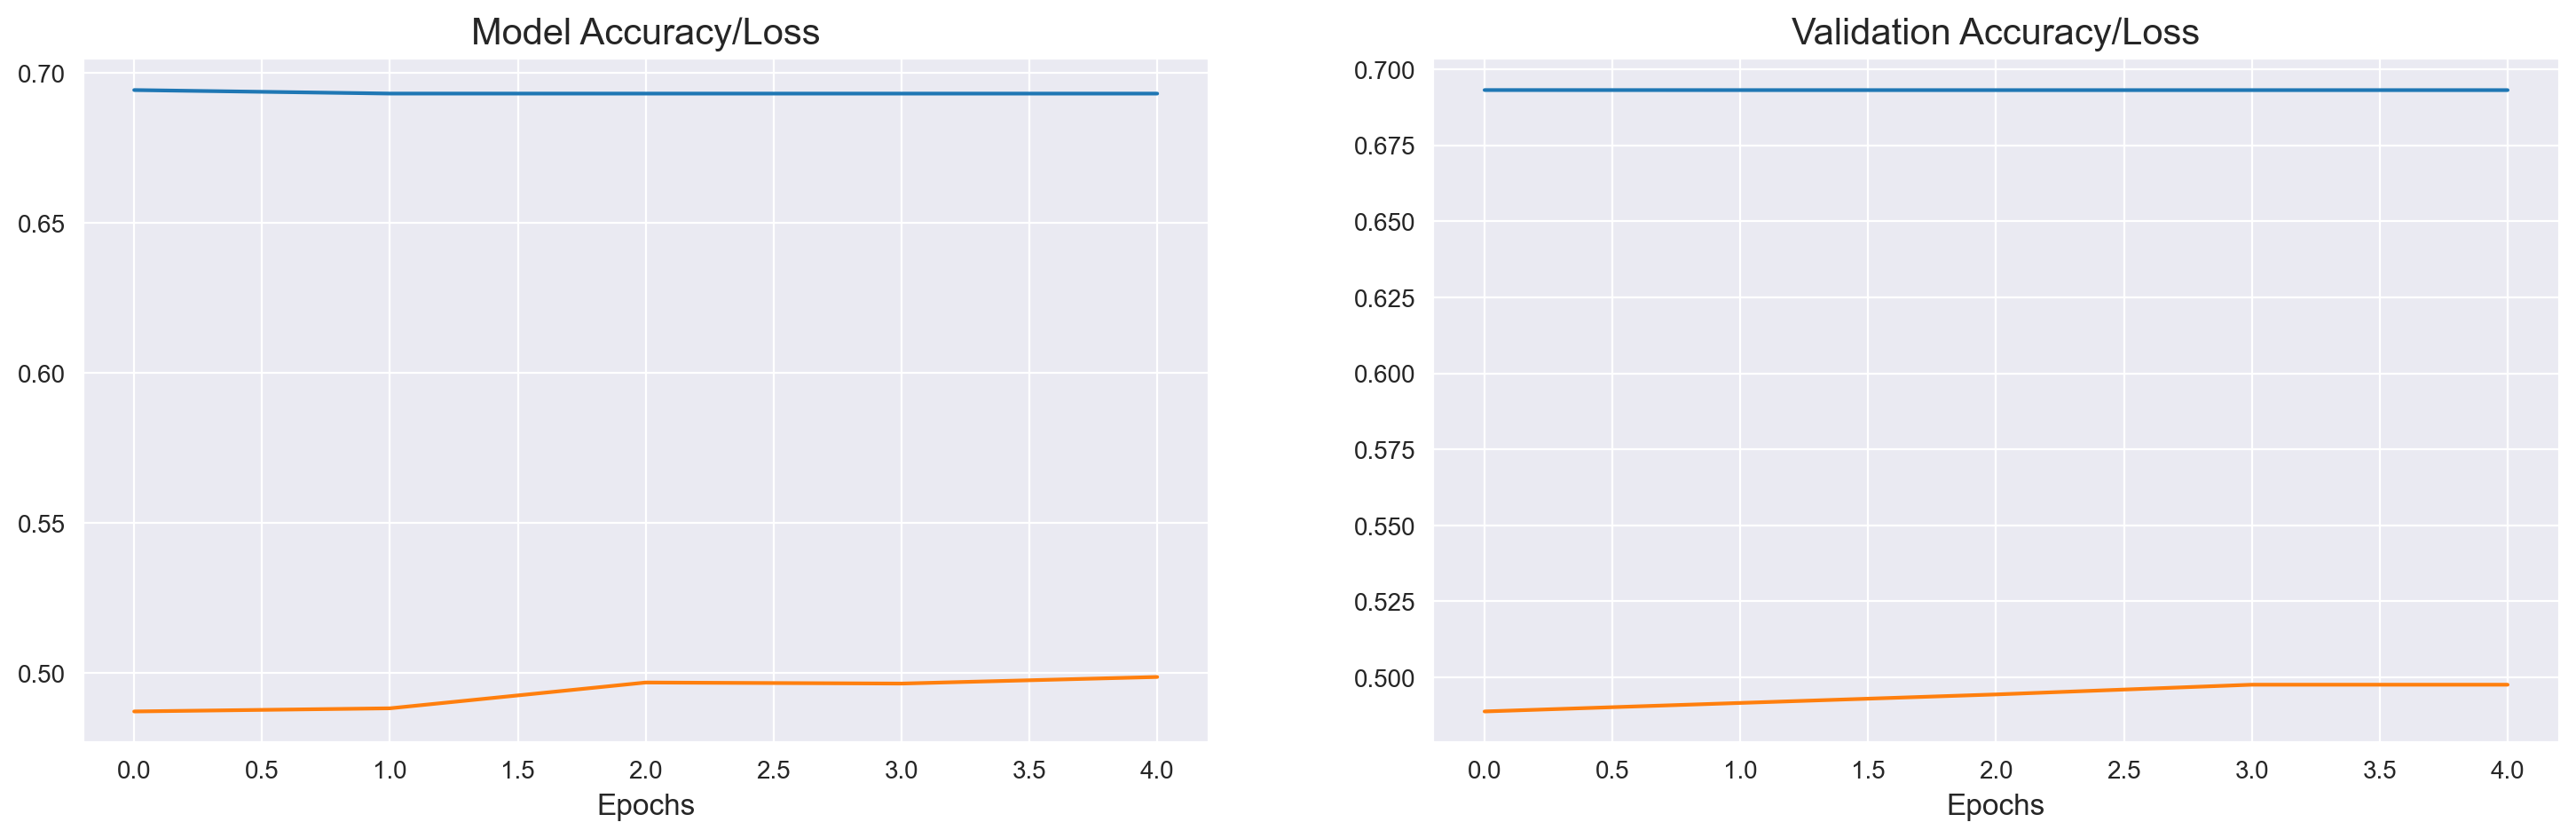

In [20]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Model Accuracy/Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['accuracy'])

plt.subplot(122)
plt.title('Validation Accuracy/Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.plot(error['val_loss'])
plt.plot(error['val_accuracy'])

plt.show()

In [45]:
result = model.predict(test_generator,batch_size = 20,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = val_generator.labels



# Evaluate for train generator
loss_acc = model.evaluate(train_generator,batch_size = 20, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)


The accuracy of the model for training data is: 49.924999475479126
The Loss of the model for training data is: 0.6931467056274414


In [46]:
# Evaluvate for validation generator
loss_acc = model.evaluate(val_generator,batch_size = 20, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for validation data is: 49.924999475479126
The Loss of the model for validation data is: 0.6931467056274414


In [47]:
model.save("model.keras")

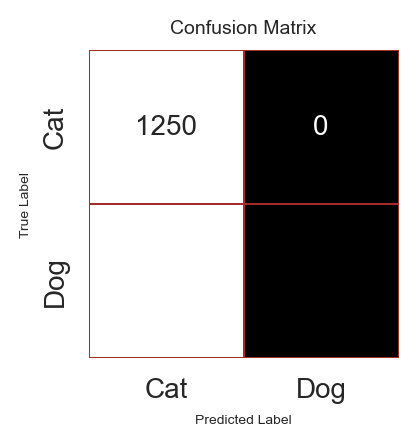

In [49]:
confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (2,2),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="brown", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=5)
plt.ylabel("True Label",fontsize=5)
plt.title("Confusion Matrix",fontsize=7)

plt.show()